In [80]:
# Import Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

from sklearn import datasets

import tensorflow as tf
import torch
import torch.nn as nn
from sklearn.metrics import classification_report





import warnings
warnings.filterwarnings('ignore')

In [81]:
def fn_plot_torch_hist(hist_df):

    # instantiate figure
    fig, axes = plt.subplots(1,2 , figsize = (15,6))

    # properties  matplotlib.patch.Patch
    props = dict(boxstyle='round', facecolor='cyan', alpha=0.5)

    # columns
    x = hist_df.columns[0]
    y1 = hist_df.columns[1]
    y2 = hist_df.columns[2]
    y3 = hist_df.columns[3]
    y4 = hist_df.columns[4]

    # Where was min loss
    best = hist_df[hist_df[y2] == hist_df[y2].min()]
    best = best.drop_duplicates(subset='test_loss')
    # pick first axis
    ax = axes[0]

    # Plot all losses
    hist_df.plot(x = x, y = [y1, y2], ax = ax)

    # calculate offset for arroe
    y_min = min(hist_df[y1].min(), hist_df[y2].min())
    y_max = max(hist_df[y1].max(), hist_df[y2].max())
    offset = (y_max-y_min)/10.0

    # little beautification
    txtFmt = "Loss: \n  train: {:6.4f}\n   test: {:6.4f}"
    txtstr = txtFmt.format(hist_df.iloc[-1][y1],
                           hist_df.iloc[-1][y2]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.95, txtstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

    # Mark arrow at lowest
    ax.annotate(f'Min: {best[y2].to_numpy()[0]:6.4f}', # text to print
                xy=(best[x].to_numpy(), best[y2].to_numpy()[0]), # Arrow start
                xytext=(best[x].to_numpy()+ offset, best[y2].to_numpy()[0]+offset), # location of text
                fontsize=14,va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor='cyan', shrink=0.05)) # arrow

    # Draw vertical line at best value
    ax.axvline(x = best[x].to_numpy(), color = 'green', linestyle='-.', lw = 3);

    ax.set_xlabel(x.title())
    ax.set_ylabel(y1.title())
    ax.set_title('Errors')
    ax.grid(True)
    ax.legend(loc = 'upper left') # model legend to upper left

    # pick second axis
    ax = axes[1]

    # Plot accuracies
    hist_df.plot(x = x, y = [y3, y4], ax = ax)

    # little beautification
    txtFmt = "Accuracy: \n  train: {:6.4f}\n  test:  {:6.4f}"
    txtstr = txtFmt.format(hist_df.iloc[-1][y3],
                           hist_df.iloc[-1][y4]) #text to plot

    # calculate offset for arroe
    y_min = min(hist_df[y3].min(), hist_df[y4].min())
    y_max = max(hist_df[y3].max(), hist_df[y4].max())
    offset = (y_max-y_min)/10.0

    # place a text box in lower middle in axes coords
    ax.text(0.3, 0.2, txtstr, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=props)

    # Mark arrow at lowest
    ax.annotate(f'Best: {best[y4].to_numpy()[0]:6.4f}', # text to print
                xy=(best[x].to_numpy(), best[y4].to_numpy()[0]), # Arrow start
                xytext=(best[x].to_numpy()- offset, best[y4].to_numpy()[0]-offset), # location of text
                fontsize=14,va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor='cyan', shrink=0.05)) # arrow


    # Draw a vertical line at best value
    ax.axvline(x = best[x].to_numpy(),
               color = 'green',
               linestyle='-.', lw = 3)

    # Labels
    ax.set_xlabel(x.title())
    ax.set_ylabel(y3.title())
    ax.set_title('Accuracies')
    ax.grid(True)
    ax.legend(loc = 'lower left')

    plt.tight_layout()


In [82]:
# HARD CODED VALUES IN CAPS AND IN 2ND CELL
RANDOM_STATE = 24
np.random.RandomState(seed=RANDOM_STATE)

N_SAMPLE = 1000
NOISE = 0.2
ALPHA = 0.001
TEST_SIZE = 0.2
EPOCHS = 2001




In [83]:

# Set the plotting parameters
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15,4),
          'axes.labelsize' : 'medium',
          'axes.titlesize': 'large',
          'xtick.labelsize': 'medium',
          'ytick.labelsize': 'medium',
          #'text.usetex':True,
          #'text.latex.unicode':True
          }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm

plt.style.use('seaborn-v0_8-darkgrid')
#plt.style.use('ggplot')



In [84]:
X, y = datasets.make_moons(n_samples=N_SAMPLE,
                           noise = NOISE ,
                           shuffle=True,
                           random_state=RANDOM_STATE)
X.shape , y.shape

((1000, 2), (1000,))

In [85]:
data_df = pd.DataFrame(X,columns=['A','B'])
data_df['target'] = y
data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


<Axes: xlabel='A', ylabel='B'>

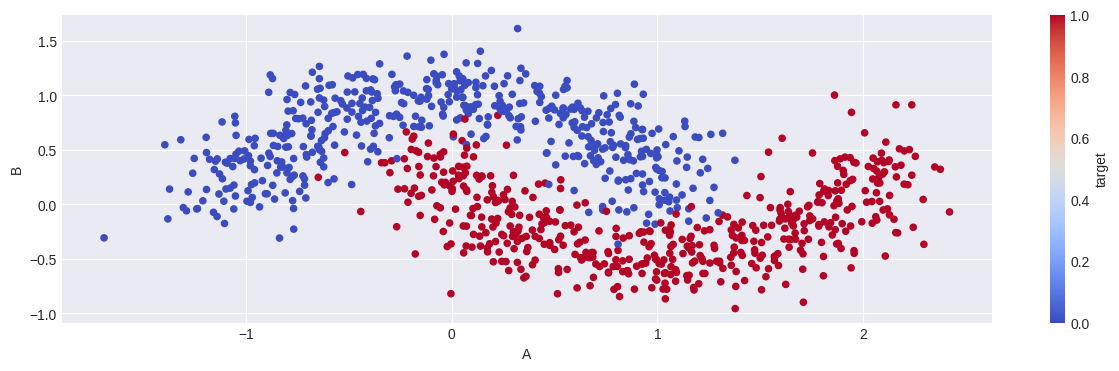

In [86]:

data_df.plot.scatter('A','B',c= 'target' ,cmap=CMAP)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=TEST_SIZE,
                                                    stratify=y,
                                                    random_state=RANDOM_STATE)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [88]:
X_train[:1]

array([[ 2.15811685, -0.25867999]])

In [89]:
input_dim = X_train.shape[1]

model = nn.Sequential(
    nn.Linear(input_dim, 5),
    nn.ReLU(),
    nn.Linear(5,5),
    nn.ReLU(),
    nn.Linear(5,4),
    nn.ReLU(),
    nn.Linear(4,3),
    nn.ReLU(),
    nn.Linear(3,2)
)


In [90]:
print(model)

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=5, bias=True)
  (3): ReLU()
  (4): Linear(in_features=5, out_features=4, bias=True)
  (5): ReLU()
  (6): Linear(in_features=4, out_features=3, bias=True)
  (7): ReLU()
  (8): Linear(in_features=3, out_features=2, bias=True)
)


In [100]:
train_X = torch.tensor(X_train, dtype=torch.float32)   #device=device
train_y = torch.tensor(y_train, dtype=torch.int64)

test_X = torch.tensor(X_test, dtype=torch.float32)
test_y = torch.tensor(y_test, dtype=torch.int64)

In [101]:
train_X

tensor([[ 2.1581, -0.2587],
        [-0.2726,  1.0721],
        [-1.0524,  0.4215],
        ...,
        [ 1.0922, -0.6233],
        [ 0.7624, -0.4503],
        [ 0.9277,  0.1778]])

In [120]:
  #Training Steps
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=ALPHA)
# some lists to collect progress
loss = []
tloss=[]
n_epoch =[]
acc= []
tacc= []

for epoch in range(EPOCHS):
    model.train()
    predict_proba = model(train_X)
    curr_loss = loss_fn(predict_proba, train_y)
    # Backpropagation
    optimizer.zero_grad()
    curr_loss.backward()
    optimizer.step()

    loss.append(curr_loss.data.item())

    y_pred = torch.argmax(predict_proba, dim=1).cpu().numpy()

    curr_acc = accuracy_score(train_y.cpu().numpy(), y_pred)
    acc.append(curr_acc)

    model.eval()
    test_proba = model(test_X)
    test_loss = loss_fn(test_proba, test_y)
    tloss.append(test_loss.data.item())

    y_pred = torch.argmax(predict_proba, dim=1).cpu().numpy()
    test_acc = accuracy_score(train_y.cpu().numpy(), y_pred)
    tacc.append(test_acc)
    n_epoch.append(epoch)


    if epoch % 500 == 0:
      print(f'Epoch: {epoch:>5d} | Loss:{curr_loss:.5f}/{test_loss:.5f}')  # | ACC:{Curr_acc}

Epoch:     0 | Loss:0.69315/0.69315
Epoch:   500 | Loss:0.69315/0.69315


In [121]:
acc

[0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5

In [122]:
loss

[0.6931473016738892,
 0.6931474804878235,
 0.6931471824645996,
 0.6931473016738892,
 0.6931474208831787,
 0.6931473016738892,
 0.6931471824645996,
 0.6931471824645996,
 0.6931474208831787,
 0.6931473612785339,
 0.6931473612785339,
 0.6931471228599548,
 0.6931471228599548,
 0.6931473612785339,
 0.6931471824645996,
 0.6931473016738892,
 0.6931471824645996,
 0.6931471228599548,
 0.6931471824645996,
 0.6931473016738892,
 0.6931471824645996,
 0.6931471824645996,
 0.6931471824645996,
 0.6931471228599548,
 0.6931471824645996,
 0.6931471824645996,
 0.6931473016738892,
 0.6931473016738892,
 0.6931471824645996,
 0.6931473016738892,
 0.6931473016738892,
 0.6931474208831787,
 0.6931471228599548,
 0.6931471228599548,
 0.6931471824645996,
 0.6931471824645996,
 0.6931471824645996,
 0.6931471824645996,
 0.6931470632553101,
 0.6931471824645996,
 0.6931473016738892,
 0.6931471824645996,
 0.6931471824645996,
 0.6931471824645996,
 0.6931473016738892,
 0.6931471228599548,
 0.6931473016738892,
 0.6931471824

In [123]:
output = model(train_X)
y_pred = torch.argmax(output, dim=1).cpu().numpy()

In [124]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [125]:
hist_df = pd.DataFrame({'epoch':n_epoch,
                        'loss':loss,
                        'test_loss':tloss,
                        'acc':acc,
                        'test_acc':tacc})

<Axes: xlabel='epoch'>

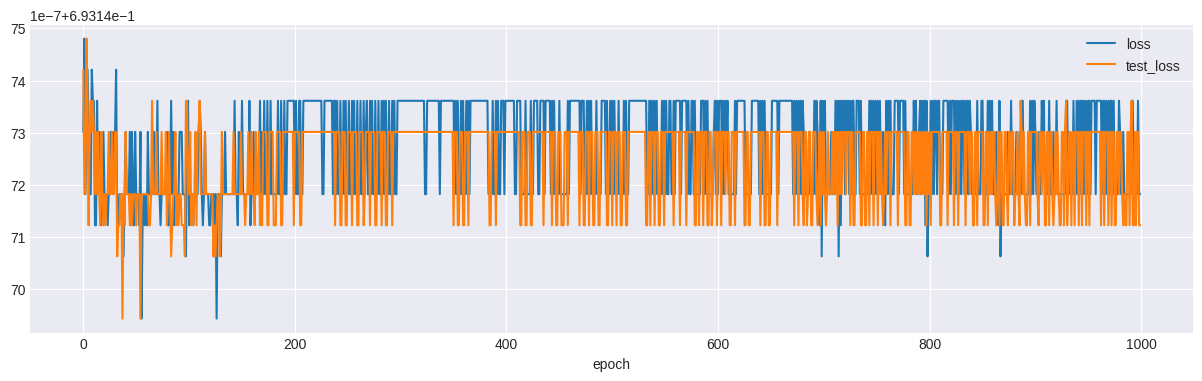

In [126]:
hist_df.plot(x='epoch', y=['loss','test_loss'])

In [127]:
print(classification_report(train_y.cpu().numpy(), y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       400
           1       0.50      1.00      0.67       400

    accuracy                           0.50       800
   macro avg       0.25      0.50      0.33       800
weighted avg       0.25      0.50      0.33       800



In [128]:
loss_fn(y_train[:1], prediction).numpy()

TypeError: cross_entropy_loss(): argument 'input' (position 1) must be Tensor, not numpy.ndarray

1.0